<a href="https://colab.research.google.com/github/KetiLaz/TechPro_Project/blob/main/Final_Assignment_Draft.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [321]:
# Mount google drive
from google.colab import drive
drive.mount('drive/')

Drive already mounted at drive/; to attempt to forcibly remount, call drive.mount("drive/", force_remount=True).


In [322]:
# Import the libraries that will be used
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sb
import re
from scipy import stats
import numpy as np
import warnings


In [323]:
#Ignore warnings
warnings.simplefilter(action = 'ignore')

# DATA PREPROCESSING
We will start by checking the dataset for any missing values, wrong entries etc. Correcting where possible and deleting the entries where correction is not an option or optimal.

In [324]:
# Load the dataset
retail_sales = pd.read_csv('/content/drive/MyDrive/TechPro/adjusted_retail_sales_data_v2.csv')
retail_sales.head()

,SalesDate,ProductCategory,SalesAmount,CustomerAge,CustomerGender,CustomerLocation,ProductRatings
0,2023-10-15,Home Appliances,609,22,Male,USA,4
1,2023-09-16,Clothing,1367,22,Female,Australia,5
2,2022-09-06,Electronics,1736,22,Male,UK,2
3,2023-02-24,Female,1838,35,Clothing,India,2
4,2022-09-24,Home Appliances,1829,35,Male,UK,5


In [325]:
retail_sales.shape
# There are 1000 entries and 7 columns in the dataset

(1000, 7)

In [326]:
#Check for NaN and the unique variables of columns

retail_sales.isna().values.any() # There are NaNs in the dataset
retail_sales.columns[retail_sales.isna().any()].tolist() # The NaNs are in the CustomerLocation column
retail_sales['CustomerLocation'].isna().sum() #There are in total 2 NaNs in the column

# Print the unique values of every column
for col in retail_sales:
  print(retail_sales[col].unique())

# From the unique values returned we can see that there are some wrong variables like 'Female' in the ProductCategory column or ages over 100 in the CustomerAge column etc

['2023-10-15' '2023-09-16' '2022-09-06' '2023-02-24' '2022-09-24'
 '2023-08-15' '2022-07-19' '12-09-2023' '2022-08-07' '2023-12-04'
 '2022-06-19' '2023-12-30' '2022-03-13' '2022-12-13' '2023-11-08'
 '2022-03-09' '2022-10-19' '2023-05-23' '2023-12-22' '2022-05-24'
 '2022-04-22' '2023-11-06' '2023-06-11' '2023-05-24' '2023-08-10'
 '2023-11-27' '2023-03-19' '2022-08-28' '2023-12-19' '2023-05-21'
 '2023-05-17' '2023-09-26' '2023-12-26' '2023-11-23' '2023-06-10'
 '2022-07-26' '2022-11-21' '2022-05-21' '2022-11-28' '2023-04-05'
 '2022-04-02' '2023-01-21' '2022-12-29' '2023-02-20' '2023-01-04'
 '2023-01-23' '2022-11-01' '2023-08-27' '2023-11-30' '2023-04-11'
 '2023-07-10' '2022-01-04' '2023-12-06' '2023-04-30' '2023-05-09'
 '2022-12-25' '2023-05-03' '2022-01-19' '2023-09-15' '2023-03-23'
 '2023-05-11' '2022-10-01' '2023-03-24' '2023-06-13' '2023-08-09'
 '2022-06-14' '2023-10-31' '2023-07-08' '2022-12-31' '2023-11-22'
 '2023-06-01' '2023-09-17' '10/07/2023' '2022-03-23' '2023-06-08'
 '2023-04-

# For each column

1. **SalesDate column**:
We will check if the dates are in the correct format (YYYY-MM-DD) and if they are not we will change them.
2. **ProductCategory column:**
Change the 'Female' entry of the column into the most frequent value of the column.
3. **SalesAmount column:**
Check that all the entries of the column are numeric and don't have special characters like $ for example.
4. **CustomerAge:**
Delete the rows with the variables that don't make sense (the values 2 and the values over 95)
5. **CustomerGender:**
Merge the values of Unknown and Did not answer together, replace the entry of 'Clothing' to the most frequent value of the column
6. **CustomerLocation:**
Replace the NaN with the most frequent value of the column
7. **ProductRatings:**
Drop the row with the entry '10', replace the entries 'one' and 'two' with 1 and 2


In [327]:
#Check if the variables of the column SalesDate are in the correct format (YYYY-MM-DD)

date_regex = re.compile(r'^\d{4}-\d{2}-\d{2}$')

print(len(retail_sales[~retail_sales['SalesDate'].str.contains(date_regex)]))

#So there are three entries that are not in the correct format and these are the following:

retail_sales[~retail_sales['SalesDate'].str.contains(date_regex)]

3


,SalesDate,ProductCategory,SalesAmount,CustomerAge,CustomerGender,CustomerLocation,ProductRatings
7,12-09-2023,Clothing,1656,35,Male,USA,3
73,10/07/2023,Home Appliances,710,35,Female,India,4
91,24-11-2023,Home Appliances,994,35,Female,USA,5


In [328]:
#We will change the SalesDate column from string to a pandas datetime and change the format of all the entries to YYYY-MM-DD

retail_sales['SalesDate'] = pd.to_datetime(retail_sales['SalesDate']) #Change the column to datetime

retail_sales['SalesDate'] = retail_sales['SalesDate'].dt.strftime('%Y-%m-%d') #Change the format to YYYY-MM-DD

retail_sales[~retail_sales['SalesDate'].str.contains(date_regex)] #If we check the column again we will see that there are no entries with the wrong date format

#Because the strftime returns an object (string) and not Datetime we will convert the column again
retail_sales['SalesDate'] = pd.to_datetime(retail_sales['SalesDate'], format = '%Y-%m-%d')
retail_sales['SalesDate']


0     2023-10-15
1     2023-09-16
2     2022-09-06
3     2023-02-24
4     2022-09-24
         ...    
995   2023-12-02
996   2023-02-02
997   2023-07-30
998   2023-01-05
999   2022-11-18
Name: SalesDate, Length: 1000, dtype: datetime64[ns]

In [329]:
#Count the entries of each variable of the columns ProductCategory, CustomerGender, CustomerAge and ProductRatings

print(retail_sales['ProductCategory'].value_counts())


print('\n', retail_sales['CustomerGender'].value_counts())


print('\n', retail_sales['CustomerAge'].value_counts())


print('\n', retail_sales['ProductRatings'].value_counts())

Electronics        357
Clothing           326
Home Appliances    316
Female               1
Name: ProductCategory, dtype: int64

 Male              488
Female            483
Unknown            23
Non-binary          4
Clothing            1
Did not answer      1
Name: CustomerGender, dtype: int64

 22     506
35     483
105      2
200      1
20       1
95       1
2        1
112      1
100      1
101      1
180      1
120      1
Name: CustomerAge, dtype: int64

 3      220
2      207
1      196
4      189
5      185
10       1
two      1
one      1
Name: ProductRatings, dtype: int64


In [330]:
#For starters we will replace the two NaNs from the CustomerLocation column with the most frequent variable

retail_sales['CustomerLocation'] = retail_sales['CustomerLocation'].fillna(retail_sales['CustomerLocation'].mode().iloc[0])
retail_sales['CustomerLocation'].unique() #Check that the NaNs where indeed filled

array(['USA', 'Australia', 'UK', 'India', 'Canada', 'Japan'], dtype=object)

In [331]:
#Change the 'one' and 'two' to 1 and 2 in the ProductRatings column and drop the row with the variable 10
retail_sales['ProductRatings'] = retail_sales['ProductRatings'].replace(['one', 'two'], ['1','2'])
mask_rating = retail_sales['ProductRatings'] == '10'
retail_sales = retail_sales[~mask_rating]

#Check that everything worked and see how any rows there are now in the dataset
print(retail_sales['ProductRatings'].unique())
print(retail_sales.shape)

['4' '5' '2' '3' '1']
(999, 7)


In [332]:
#Change the variable 'Female' in the ProducCategory column with the most frequent variable

product_category_freq = retail_sales['ProductCategory'].mode().iloc[0] #Find the most frequent value

# Replace the specified value with the most frequent value
retail_sales['ProductCategory'] = retail_sales['ProductCategory'].replace('Female', product_category_freq)

retail_sales['ProductCategory'].unique()


array(['Home Appliances', 'Clothing', 'Electronics'], dtype=object)

In [333]:
#Replace the entry 'Clothing' from the CustomerGender column with the most frequent value

gender_freq = retail_sales['CustomerGender'].mode().iloc[0] #Find the most frequent value

# Replace the specified value with the most frequent value
retail_sales['CustomerGender'] = retail_sales['CustomerGender'].replace('Clothing', gender_freq)

retail_sales['CustomerGender'].unique() #Check that the replacment was done


array(['Male', 'Female', 'Unknown', 'Did not answer', 'Non-binary'],
      dtype=object)

In [334]:
#Incorporate the entry of 'Did not answer' with the 'Unknown' for the CustomerGender column

retail_sales['CustomerGender'] = retail_sales['CustomerGender'].replace('Did not answer', 'Unknown')

print(retail_sales['CustomerGender'].unique()) #Check that the replacment was done

print(retail_sales.shape) #Check how many rows are now

['Male' 'Female' 'Unknown' 'Non-binary']
(999, 7)


In [335]:
#Remove the ages over 95 and the entry of 2 from the column CustomerAge

retail_sales = retail_sales[(retail_sales['CustomerAge'] > 18) & (retail_sales['CustomerAge'] < 95)]

print(retail_sales['CustomerAge'].value_counts()) #Check that the replacment was done
print(retail_sales.shape) #Check how many rows are now


22    506
35    482
20      1
Name: CustomerAge, dtype: int64
(989, 7)


In [336]:
#Check if the column SalesAmount has anything other than numeric values. If yes fix them.

retail_sales[~retail_sales['SalesAmount'].str.match('[0-9]*$')] #Using regex to find rows in the SalesAmount column that contains other characters other than numbers



,SalesDate,ProductCategory,SalesAmount,CustomerAge,CustomerGender,CustomerLocation,ProductRatings
18,2023-12-22,Clothing,779%,35,Male,Canada,5
65,2023-08-09,Electronics,3-0,35,Female,Japan,3
72,2023-09-17,Home Appliances,3-00,35,Male,USA,3
290,2023-09-19,Clothing,3-0,22,Female,India,1
472,2022-04-27,Home Appliances,3-0,35,Unknown,Canada,3
926,2023-11-08,Electronics,3-0,35,Female,UK,3


In [337]:
#There are six entries in the SalesAmount column that are wrong and we will correct.
retail_sales['SalesAmount'] = retail_sales['SalesAmount'].replace(['779%', '3-0', '3-00'], ['779','30', '300'])

print(retail_sales[~retail_sales['SalesAmount'].str.match('[0-9]*$')]) #Checking again that there are no wrong entries

#Change the column SalesAmount from string to integer
retail_sales['SalesAmount'] = retail_sales['SalesAmount'].astype(int)
print(retail_sales['SalesAmount'].dtype)

Empty DataFrame
Columns: [SalesDate, ProductCategory, SalesAmount, CustomerAge, CustomerGender, CustomerLocation, ProductRatings]
Index: []
int64


In [338]:
retail_sales.shape

#By the end of the data cleaning 11 rows were dropped

(989, 7)

# Descriptive statistcs.
We will try to get some insight into the sales trends, customer demographics and product performance by calculating basic statistics. Also we will group average sales per product category, age distribution of customers, typical product ratings and customer location

We will use the describe() function of pandas. For numeric data, the result’s index will include count, mean, std, min, max as well as lower, 50 and upper percentiles. By default the lower percentile is 25 and the upper percentile is 75. The 50 percentile is the same as the median. For object data (e.g. strings or timestamps), the result’s index will include count, unique, top, and freq. The top is the most common value. The freq is the most common value’s frequency. Timestamps also include the first and last items.

In [339]:
#Search for outliers in SalesAmount using the z_score
#Calculate the z-score
z_score = np.abs(stats.zscore(retail_sales['SalesAmount']))

#Identify the outliers with a z-score greater than 3
sales_outliers = retail_sales[z_score > 3]
print(sales_outliers) #There is only one outlier

#Replacing the outlier with the median value of the column
retail_sales.loc[z_score > 3, 'SalesAmount'] = retail_sales['SalesAmount'].median()


     SalesDate ProductCategory  SalesAmount  CustomerAge CustomerGender  \
991 2022-02-13     Electronics      1875000           22           Male   

    CustomerLocation ProductRatings  
991        Australia              2  


In [340]:
for col in retail_sales:
  print('\n',retail_sales[col].describe())


 count                     989
unique                    548
top       2023-07-16 00:00:00
freq                        6
first     2022-01-02 00:00:00
last      2023-12-31 00:00:00
Name: SalesDate, dtype: object

 count             989
unique              3
top       Electronics
freq              352
Name: ProductCategory, dtype: object

 count     989.000000
mean      976.296259
std       540.289394
min        22.000000
25%       506.000000
50%       985.000000
75%      1428.000000
max      1994.000000
Name: SalesAmount, dtype: float64

 count    989.000000
mean      28.333670
std        6.503494
min       20.000000
25%       22.000000
50%       22.000000
75%       35.000000
max       35.000000
Name: CustomerAge, dtype: float64

 count      989
unique       4
top       Male
freq       482
Name: CustomerGender, dtype: object

 count     989
unique      6
top       USA
freq      208
Name: CustomerLocation, dtype: object

 count     989
unique      5
top         3
freq      219
Name: Pr

**From the describe function we gather some information about our dataset:**

*   The dataset is spanning almost 2 years
*   Electronics are the most frequent product category
*   Most of the buyers identify as Male
*   Most of the buyers are located in the USA
*   The average age of the customers is 28
*   The most frequent product rating is 3
*   The average sales amount is ~ 976$






In [341]:
#Show the average sales per product category with the groupby() function

retail_sales[['SalesAmount', 'ProductCategory']].groupby('ProductCategory').mean()

#We can see that there is not much of a difference among the product categories

,SalesAmount
ProductCategory,
Clothing,972.940994
Electronics,980.946023
Home Appliances,974.530159


In [342]:
#Average sales per age distribution

retail_sales[['SalesAmount', 'CustomerAge']].groupby('CustomerAge').mean()

#Customers aged 22 seem to spend more as Customers, the mean of the customers aged 20 is virtual because we know that we have only one entry

,SalesAmount
CustomerAge,
20,1755.000000
22,972.707510
35,978.448133


In [343]:
#Average sales per product ratings

retail_sales[['SalesAmount', 'ProductRatings']].groupby('ProductRatings').mean()

#It is not suprisingly that most of the sales are of the products rated as 5, suprisingly followed by products rated as 1.

,SalesAmount
ProductRatings,
1,1004.154639
2,975.145631
3,916.547945
4,987.712766
5,1008.005495


In [344]:
#Average sales per customer location

retail_sales[['SalesAmount', 'CustomerLocation']].groupby('CustomerLocation').mean()

#While most of the customers are located in the USA, the customers from India and UK spend on average more money.

,SalesAmount
CustomerLocation,
Australia,924.575221
Canada,913.411168
India,1065.481928
Japan,897.707547
UK,1025.110553
USA,986.125000


# Data visualization

Create visualizations that show sales trends, customer demographics and product performance.

In [345]:
#Sort the dataset in the ascending order of date
retail_sales_vis = retail_sales.sort_values(by = 'SalesDate')

#Extract year and month from the SalesDate column
retail_sales_vis['YearMonth'] = retail_sales_vis['SalesDate'].dt.to_period('M')

#Group by product category and date (year_month) with the total amount of sales
group_category_date = retail_sales_vis.groupby(['ProductCategory', 'YearMonth'])['SalesAmount'].sum().reset_index()
group_category_date



,ProductCategory,YearMonth,SalesAmount
0,Clothing,2022-01,17040
1,Clothing,2022-02,12909
2,Clothing,2022-03,13680
3,Clothing,2022-04,12520
4,Clothing,2022-05,17796
...,...,...,...
67,Home Appliances,2023-08,13460
68,Home Appliances,2023-09,12898
69,Home Appliances,2023-10,15389
70,Home Appliances,2023-11,10257


Text(0.5, 1.0, 'Total Sales by Month')

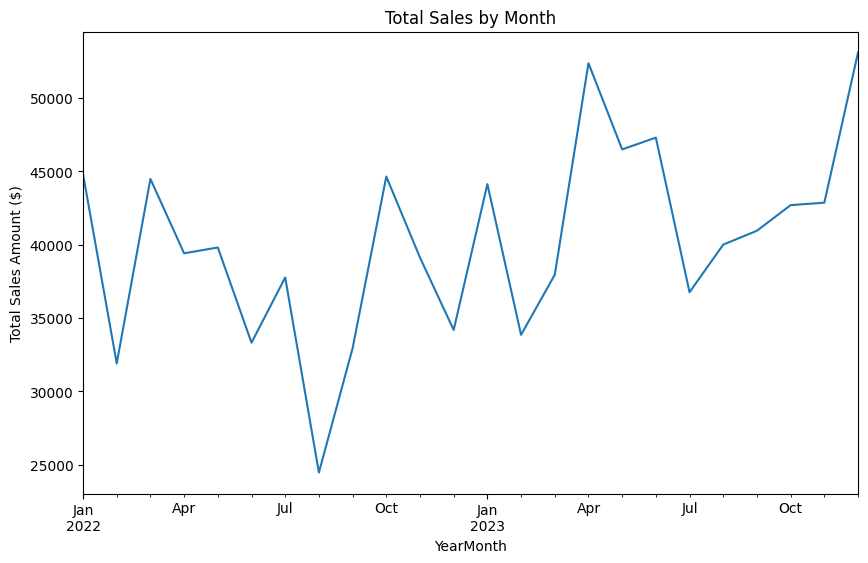

In [346]:
#First let's see the total amount of sales by month
fig, ax = plt.subplots(figsize=(10, 6))
retail_sales_vis.groupby('YearMonth')['SalesAmount'].sum().plot()
ax.set_ylabel('Total Sales Amount ($)')
ax.set_title('Total Sales by Month')

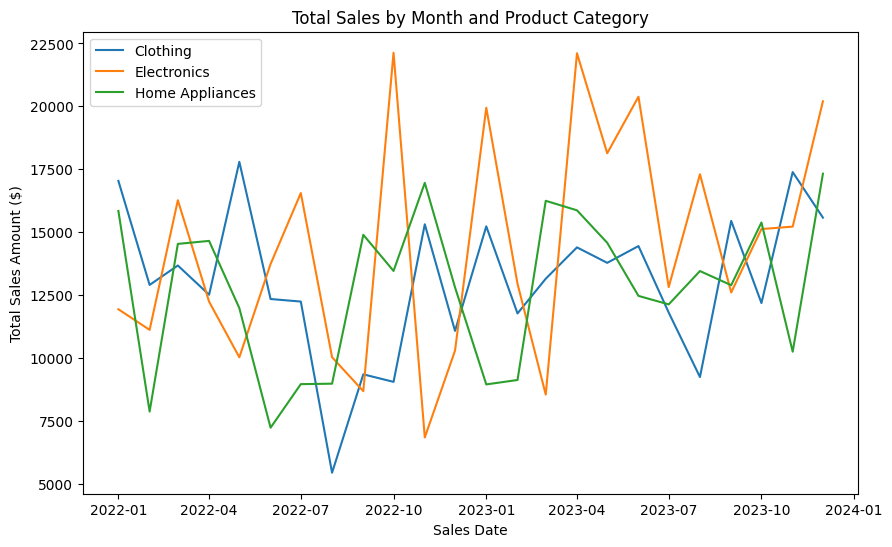

In [347]:
# Create a time series plot for each product category
fig, ax = plt.subplots(figsize=(10, 6))

for category, group in group_category_date.groupby('ProductCategory'):
    ax.plot(group['YearMonth'].dt.to_timestamp(), group['SalesAmount'], label=category)

# Set labels and title
ax.set_xlabel('Sales Date')
ax.set_ylabel('Total Sales Amount ($)')
ax.set_title('Total Sales by Month and Product Category')

# Show legend
ax.legend()

# Show the plot
plt.show()


Text(0, 0.5, 'Total Sales Amount ($)')

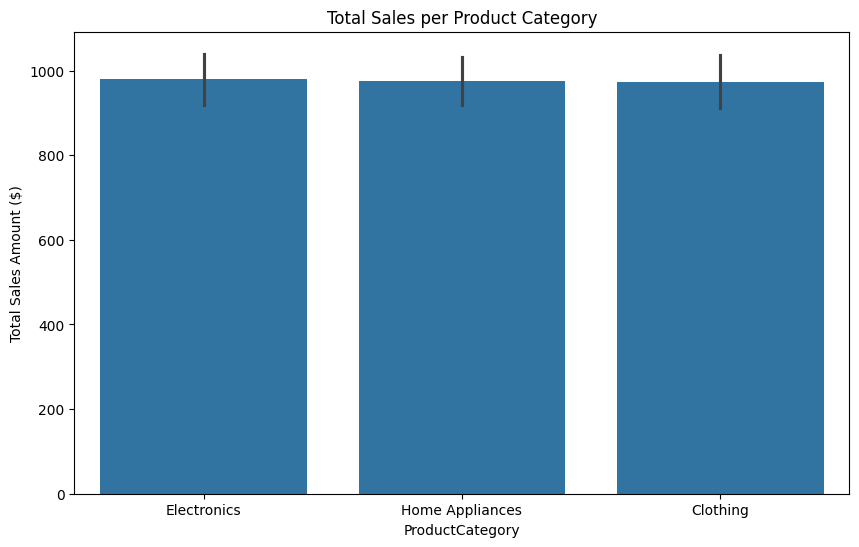

In [348]:
#Create a barplot for the total sales per product category
fig, ax = plt.subplots(figsize=(10, 6))

# Sales by Product Category
sb.barplot(x='ProductCategory', y='SalesAmount', data=retail_sales_vis)
ax.set_title('Total Sales per Product Category')
ax.set_ylabel('Total Sales Amount ($)')

In [349]:
#Lets visualise the total sales per product rating throughout our dateframe
#Group by product rating and date (year_month) with the total amount of sales
group_rating_date = retail_sales_vis.groupby(['ProductRatings', 'YearMonth'])['SalesAmount'].sum().reset_index()
group_rating_date


,ProductRatings,YearMonth,SalesAmount
0,1,2022-01,7235
1,1,2022-02,4560
2,1,2022-03,7664
3,1,2022-04,6993
4,1,2022-05,15537
...,...,...,...
115,5,2023-08,6972
116,5,2023-09,11832
117,5,2023-10,4635
118,5,2023-11,5773


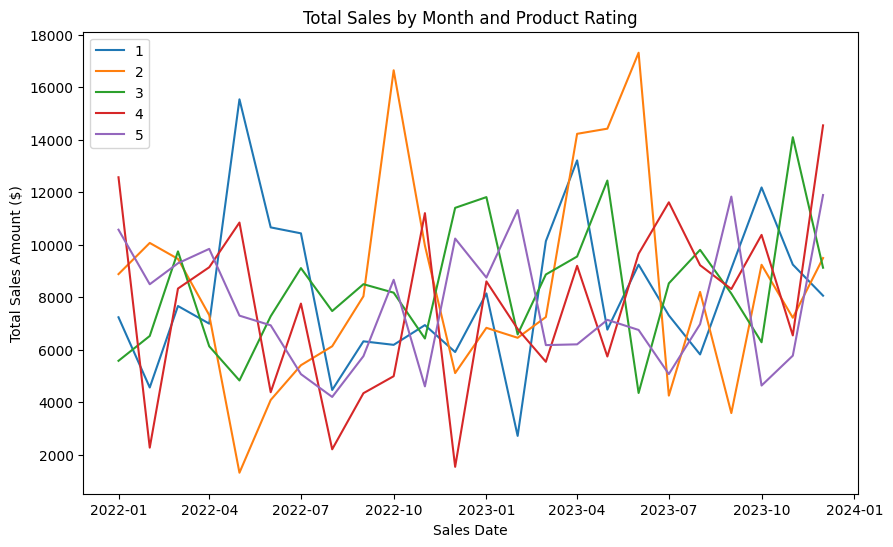

In [350]:
# Create a time series plot for each product rating
fig, ax = plt.subplots(figsize=(10, 6))

for ratings, group in group_rating_date.groupby('ProductRatings'):
    ax.plot(group['YearMonth'].dt.to_timestamp(), group['SalesAmount'], label=ratings)

# Set labels and title
ax.set_xlabel('Sales Date')
ax.set_ylabel('Total Sales Amount ($)')
ax.set_title('Total Sales by Month and Product Rating')

# Show legend
ax.legend()

# Show the plot
plt.show()

Text(0, 0.5, 'Total Sales Amount ($)')

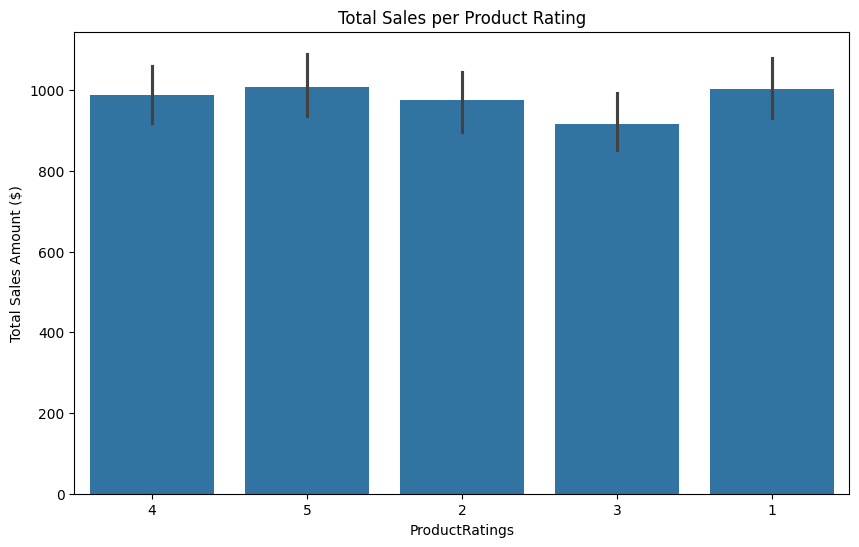

In [351]:
#Create a barplot for the total sales per product rating
fig, ax = plt.subplots(figsize=(10, 6))

# Sales by Product Category
sb.barplot(x='ProductRatings', y='SalesAmount', data=retail_sales)
ax.set_title('Total Sales per Product Rating')
ax.set_ylabel('Total Sales Amount ($)')

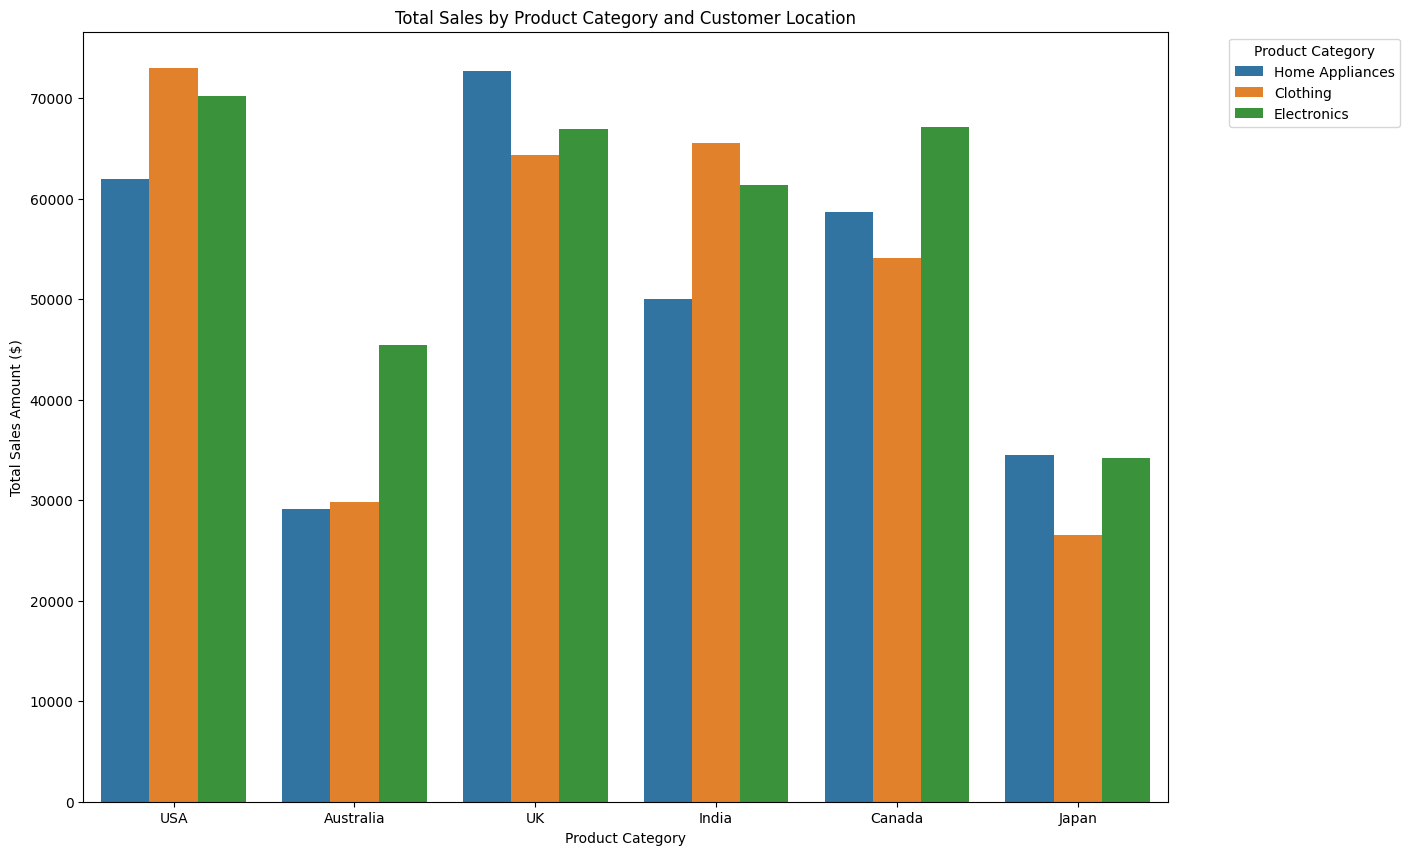

In [352]:
# Create a multi-faceted bar plot for sales by customer location
plt.figure(figsize=(14, 10))

# Sales by Product Category
sb.barplot(x='CustomerLocation', y='SalesAmount', data=retail_sales, hue='ProductCategory', ci=None, estimator=sum)

# Set labels and title
plt.title('Total Sales by Product Category and Customer Location')
plt.xlabel('Product Category')
plt.ylabel('Total Sales Amount ($)')

# Show legend
plt.legend(title='Product Category', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.show()


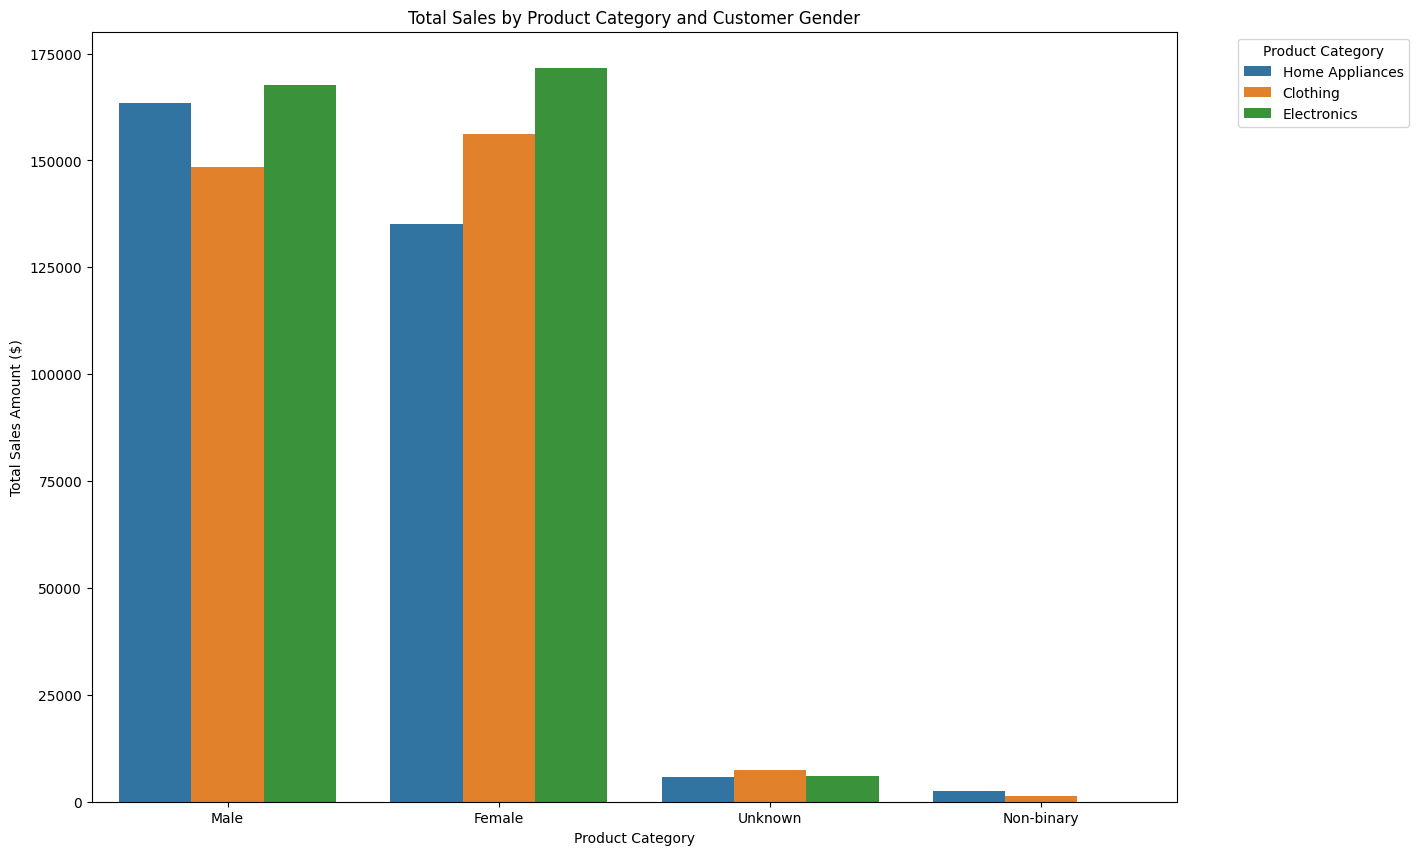

In [353]:
# Create a multi-faceted bar plot for sales by customer gender
plt.figure(figsize=(14, 10))

# Sales by Product Category
sb.barplot(x='CustomerGender', y='SalesAmount', data=retail_sales, hue='ProductCategory', ci=None, estimator=sum)

# Set labels and title
plt.title('Total Sales by Product Category and Customer Gender')
plt.xlabel('Product Category')
plt.ylabel('Total Sales Amount ($)')

# Show legend
plt.legend(title='Product Category', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.show()


In [354]:
!pip install geocoder
!pip install geopy
!pip install statsmodels


In [355]:
import folium
from folium import plugins
from folium.plugins import HeatMap
import ipywidgets
#from ipyleaflet import Map, Marker, MarkerCluster, Heatmap
import geocoder
import geopy

In [356]:
location_sales = retail_sales_vis.groupby(['CustomerLocation']).agg({'SalesAmount' : 'sum'}).reset_index()
mp = folium.Map(location=[41,-99], zoom_start=3.5)

loc =[]

location_list = retail_sales_vis.CustomerLocation.unique().tolist()
for i in location_list:
    geo = geocoder.arcgis(i)
    val = location_sales.loc[location_sales['CustomerLocation'] ==i]['SalesAmount'].item()
    loc.append([geo.lat, geo.lng,val ])
    folium.Marker([geo.lat,geo.lng],
                  opacity=0,
                  tooltip = ('<body>Country: {} <br> Sales: {}M</body>'.format(i, round(val/1000000,3)))).add_to(mp)

HeatMap(loc).add_to(mp)
folium.LayerControl().add_to(mp)


mp

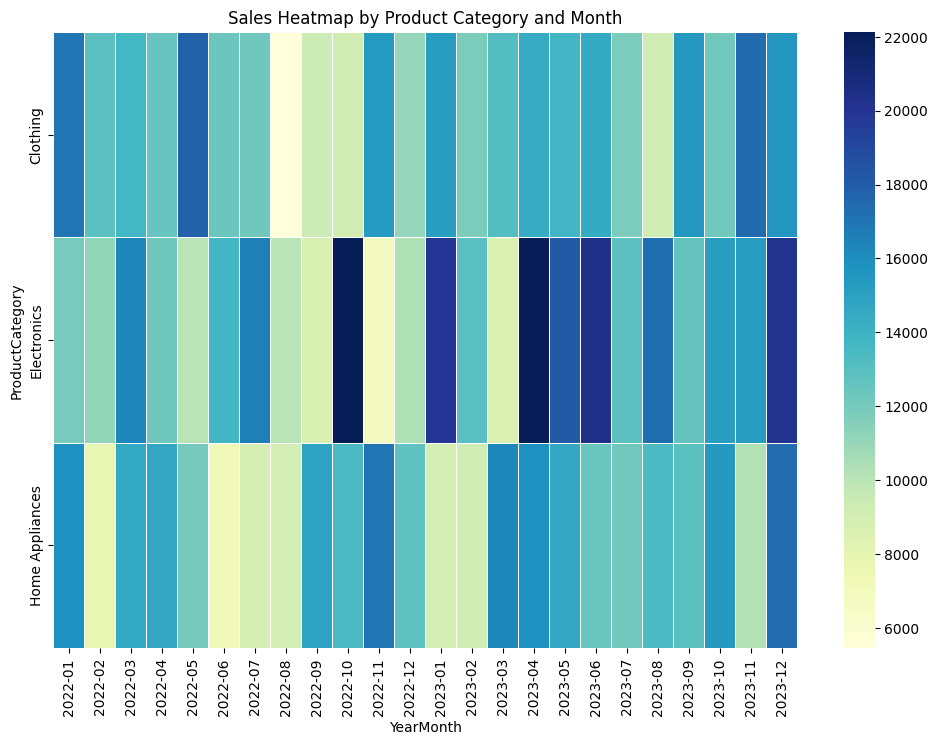

In [357]:
# Create a pivot table for the heatmap
heatmap_data = retail_sales_vis.pivot_table(values='SalesAmount', index='ProductCategory', columns='YearMonth', aggfunc='sum')
# Create the heatmap
plt.figure(figsize=(12, 8))
sb.heatmap(heatmap_data, cmap='YlGnBu', annot=False, fmt=".0f", linewidths=.5)
plt.title('Sales Heatmap by Product Category and Month')
plt.show()

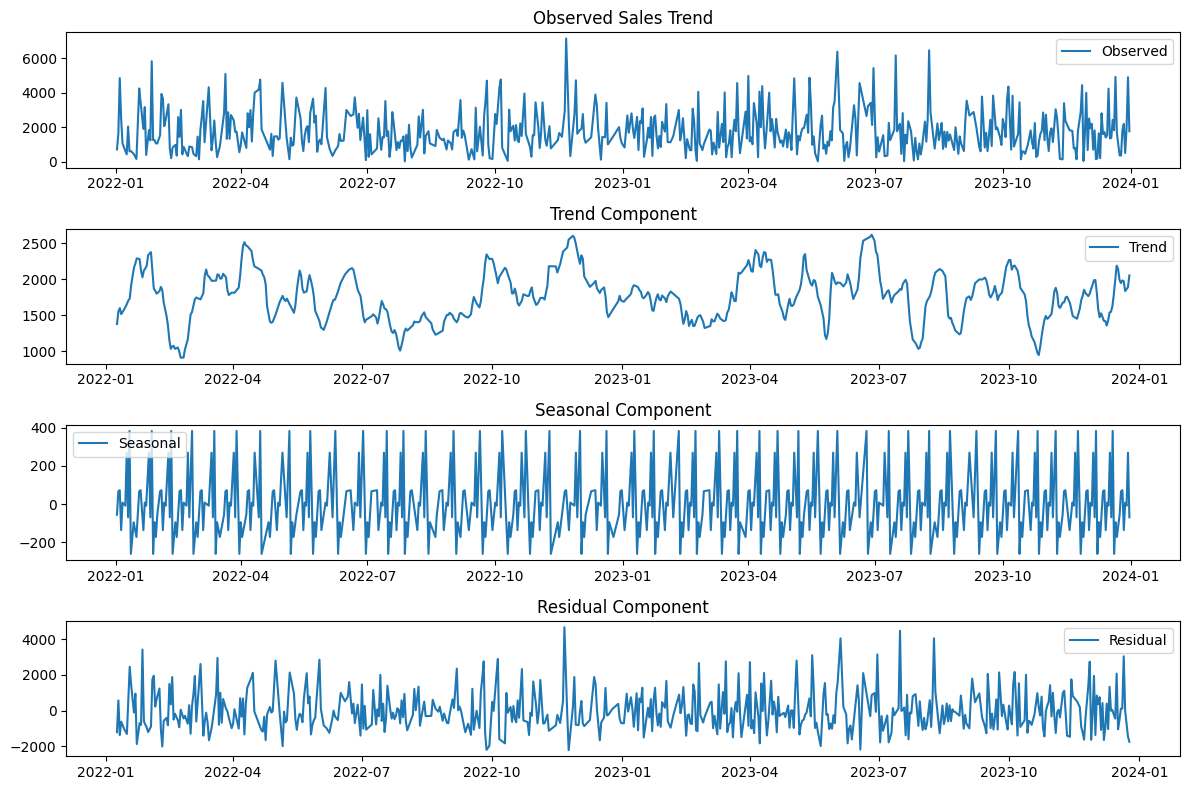

In [358]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Create a time series for seasonal decomposition
ts = retail_sales_vis.groupby('SalesDate')['SalesAmount'].sum()

# Perform seasonal decomposition
result = seasonal_decompose(ts, model='additive', period=12)  # Assuming a yearly seasonality

# Plot the components
plt.figure(figsize=(12, 8))

plt.subplot(4, 1, 1)
plt.plot(result.observed, label='Observed')
plt.legend()
plt.title('Observed Sales Trend')

plt.subplot(4, 1, 2)
plt.plot(result.trend, label='Trend')
plt.legend()
plt.title('Trend Component')

plt.subplot(4, 1, 3)
plt.plot(result.seasonal, label='Seasonal')
plt.legend()
plt.title('Seasonal Component')

plt.subplot(4, 1, 4)
plt.plot(result.resid, label='Residual')
plt.legend()
plt.title('Residual Component')

plt.tight_layout()
plt.show()

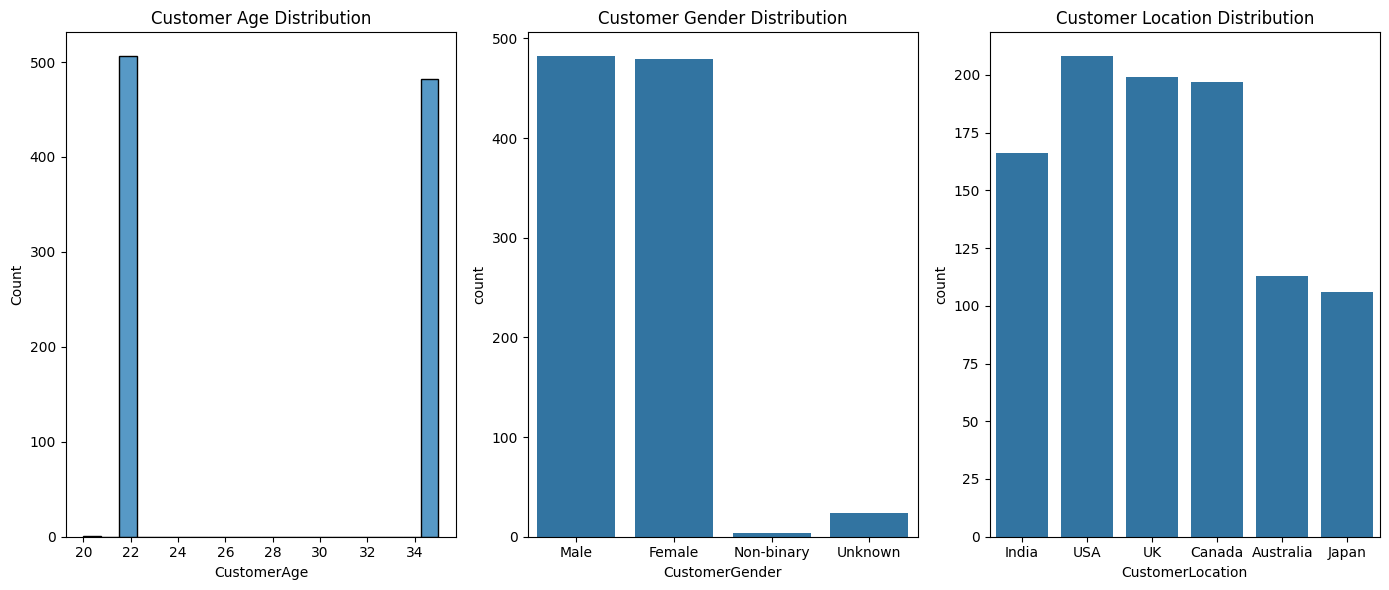

In [359]:
# Create a grid of histograms for customer demographics
plt.figure(figsize=(14, 6))

# Histogram for Customer Age
plt.subplot(1, 3, 1)
sb.histplot(retail_sales_vis['CustomerAge'], bins=20)
plt.title('Customer Age Distribution')

# Countplot for Customer Gender
plt.subplot(1, 3, 2)
sb.countplot(x='CustomerGender', data=retail_sales_vis)
plt.title('Customer Gender Distribution')

# Countplot for Customer Location
plt.subplot(1, 3, 3)
sb.countplot(x='CustomerLocation', data=retail_sales_vis)
plt.title('Customer Location Distribution')

# Adjust layout
plt.tight_layout()
plt.show()

# Inferential statistics

We will conduct two simple hypothesis testings. First we will test if average sales differ between product categories. Second we will test is average sales differ between locations.


In the first hypothesis testing the independent variable is the product category and the dependent variable is the sales amount.

The null hypothesis is that the sales don't differ between the product categories. The alternate hypothesis is that sales differ between categories.

Our confidence level is 95%.

In [360]:
#We will use one-way ANOVA in order to test if the means of the sales amount differ significantly between the categories

alpha = 0.05

categories_anova = stats.f_oneway(retail_sales['SalesAmount'][retail_sales['ProductCategory'] == 'Electronics'],
                                  retail_sales['SalesAmount'][retail_sales['ProductCategory'] == 'Home Appliances'],
                                  retail_sales['SalesAmount'][retail_sales['ProductCategory'] == 'Clothing'])

print('ANOVA results:')
print('F-statistic: ', categories_anova.statistic)
print('p-value: ', categories_anova.pvalue)

if categories_anova.pvalue < alpha:
  print('We can reject the null hypothesis. There is evidence that the sales differ significantly between the categories')
else:
  print('We cannot reject the null hypothesis')

ANOVA results:
F-statistic:  0.02088580986064547
p-value:  0.9793312213582899
We cannot reject the null hypothesis


In the second hypothesis testing the independent variable is the customer location and the dependent variable is the sales amount.

The null hypothesis is that the sales don't differ between the customer regions. The alternate hypothesis is that sales differ between regions.

Our confidence level is again 95%.

In [361]:
#Again we will use one way ANOVA to test if the means of the sales amount differ between the customer locations

locations_anova = stats.f_oneway(retail_sales['SalesAmount'][retail_sales['CustomerLocation'] == 'USA'],
                         retail_sales['SalesAmount'][retail_sales['CustomerLocation'] == 'India'],
                         retail_sales['SalesAmount'][retail_sales['CustomerLocation'] == 'Australia'],
                         retail_sales['SalesAmount'][retail_sales['CustomerLocation'] == 'UK'],
                         retail_sales['SalesAmount'][retail_sales['CustomerLocation'] == 'Canada'],
                         retail_sales['SalesAmount'][retail_sales['CustomerLocation'] == 'Japan'])

print('Results of ANOVA:')
print('F-statistic: ', locations_anova.statistic)
print('p-value: ', locations_anova.pvalue)

if locations_anova.pvalue < alpha:
  print('We can reject the null hypothesis. The average sales differ significantly between the customer locations')
else:
  print('We fail to reject the null hypothesis')

Results of ANOVA:
F-statistic:  2.4505427337017904
p-value:  0.03220459158574889
We can reject the null hypothesis. The average sales differ significantly between the customer locations


In [362]:
# Out of curiosity we will also see if the sales differ between customer genders

gender_anova = stats.f_oneway(retail_sales['SalesAmount'][retail_sales['CustomerGender'] == 'Male'],
                                  retail_sales['SalesAmount'][retail_sales['CustomerGender'] == 'Female'],
                                  retail_sales['SalesAmount'][retail_sales['CustomerGender'] == 'Non-binary'])

print('ANOVA results:')
print('F-statistic: ', gender_anova.statistic)
print('p-value: ', gender_anova.pvalue)

if gender_anova.pvalue < alpha:
  print('We can reject the null hypothesis. There is evidence that the sales differ significantly between the genders')
else:
  print('We cannot reject the null hypothesis')

ANOVA results:
F-statistic:  0.35141163387421015
p-value:  0.7037843236329542
We cannot reject the null hypothesis


# Predictive modeling (Linear Regression)

We will predict sales amount based on product category, customer gender and location and product ratings.

In [363]:
#First to predict sales based on product categories

#Because ProductCategory is a categorical variable we will convert it to dummy variables
retail_sales_category_dummies = pd.get_dummies(retail_sales, columns = ['ProductCategory'], drop_first = True)

print(retail_sales_category_dummies.head())
print(retail_sales_category_dummies.shape)

   SalesDate  SalesAmount  CustomerAge CustomerGender CustomerLocation  \
0 2023-10-15          609           22           Male              USA   
1 2023-09-16         1367           22         Female        Australia   
2 2022-09-06         1736           22           Male               UK   
3 2023-02-24         1838           35           Male            India   
4 2022-09-24         1829           35           Male               UK   

  ProductRatings  ProductCategory_Electronics  ProductCategory_Home Appliances  
0              4                            0                                1  
1              5                            0                                0  
2              2                            1                                0  
3              2                            1                                0  
4              5                            0                                1  
(989, 8)


In [391]:
#Split the data into X (the independent variable) and y (the target variable)
X_category = retail_sales_category_dummies.drop(['SalesAmount', 'SalesDate', 'CustomerAge', 'CustomerGender', 'CustomerLocation', 'ProductRatings'], axis = 1)
y_category = retail_sales_category_dummies['SalesAmount']

#Split the data into test and training sets. 80% of the dataset will be used for training and the other 20% for testing the model
X_category_train, X_category_test, y_category_train, y_category_test = train_test_split(X_category, y_category, test_size = 0.2, random_state=42)

#Create and train the model
model_category = LinearRegression()
model_category.fit(X_category_train, y_category_train)

#Make predictions on the test set
y_category_pred = model_category.predict(X_category_test)

#Evaluate the model
mse_category = mean_squared_error(y_category_test, y_category_pred)
category_score = model_category.score(X_category_test, y_category_test)
print('The score of the model is: ', category_score)
print('The mean squared eror of the model is: ', mse_category)

The score of the model is:  -0.022788414939035384
The mean squared eror of the model is:  318394.74561429804


In [392]:
# Linear Regression using a regularisation method (Ridge regression)

from sklearn.linear_model import Ridge

#Because ProductCategory is a categorical variable we will convert it to dummy variables
retail_sales_category_dummies = pd.get_dummies(retail_sales, columns = ['ProductCategory'], drop_first = True)

retail_sales_category_dummies.shape

#Split the data into X_reg (the independent variable) and y_reg (the target variable)
X_reg = retail_sales_category_dummies.drop(['SalesAmount', 'SalesDate', 'CustomerAge', 'CustomerGender', 'CustomerLocation', 'ProductRatings'], axis = 1)
y_reg = retail_sales_category_dummies['SalesAmount']

#Split the data into test and training sets. 80% of the dataset will be used for training and the other 20% for testing the model
X_reg_train, X_reg_test, y_reg_train, y_reg_test = train_test_split(X_reg, y_reg, test_size = 0.2, random_state=42)

# Create and fit the model
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_reg_train, y_reg_train)

# Making predictions
predictions = ridge_model.predict(X_reg_test)

#Evaluate the model
mse_reg = mean_squared_error(y_reg_test, predictions)
category_score_reg = ridge_model.score(X_reg_test, y_reg_test)
print('The score of the model is: ', category_score_reg)
print('The mean square error of the model is: ', mse_reg)

The score of the model is:  -0.02258921748809639
The mean square error of the model is:  318332.7353091437


In [366]:
# Now we will predict sales based on the customer location

#Because CustomerLocation is a categorical variable we will convert it to dummy variables
retail_sales_location = pd.get_dummies(retail_sales, columns = ['CustomerLocation'], drop_first = True)

print(retail_sales_location.head())
print(retail_sales_location.shape)

   SalesDate  ProductCategory  SalesAmount  CustomerAge CustomerGender  \
0 2023-10-15  Home Appliances          609           22           Male   
1 2023-09-16         Clothing         1367           22         Female   
2 2022-09-06      Electronics         1736           22           Male   
3 2023-02-24      Electronics         1838           35           Male   
4 2022-09-24  Home Appliances         1829           35           Male   

  ProductRatings  CustomerLocation_Canada  CustomerLocation_India  \
0              4                        0                       0   
1              5                        0                       0   
2              2                        0                       0   
3              2                        0                       1   
4              5                        0                       0   

   CustomerLocation_Japan  CustomerLocation_UK  CustomerLocation_USA  
0                       0                    0                     1 

In [393]:
#Split the data into X (the independent variable) and y (the target variable)
X_location = retail_sales_location.drop(['SalesAmount', 'SalesDate', 'CustomerAge', 'CustomerGender', 'ProductCategory', 'ProductRatings'], axis = 1)
y_location = retail_sales_location['SalesAmount']

#Split the data into test and training sets. 80% of the dataset will be used for training and the other 20% for testing the model
X_location_train, X_location_test, y_location_train, y_location_test = train_test_split(X_location, y_location, test_size = 0.2, random_state=42)

#Create and train the model
model_location = LinearRegression()
model_location.fit(X_location_train, y_location_train)

#Make predictions on the test set
y_location_pred = model_location.predict(X_location_test)

#Evaluate the model
mse_location = mean_squared_error(y_location_test, y_location_pred)
location_score = model_location.score(X_location_test, y_location_test)
print('The score of the model is: ', location_score)
print('The mean square error of the model is: ', mse_location)

The score of the model is:  -0.00855521997320996
The mean square error of the model is:  313963.94211258576


In [368]:
#Build a linear regression to predict sales based on the customer gender

#Because CustomerGender is a categorical variable we will convert it to dummy variables
retail_sales_gender = pd.get_dummies(retail_sales, columns = ['CustomerGender'], drop_first = True)

print(retail_sales_gender.head())
print(retail_sales_gender.shape)

   SalesDate  ProductCategory  SalesAmount  CustomerAge CustomerLocation  \
0 2023-10-15  Home Appliances          609           22              USA   
1 2023-09-16         Clothing         1367           22        Australia   
2 2022-09-06      Electronics         1736           22               UK   
3 2023-02-24      Electronics         1838           35            India   
4 2022-09-24  Home Appliances         1829           35               UK   

  ProductRatings  CustomerGender_Male  CustomerGender_Non-binary  \
0              4                    1                          0   
1              5                    0                          0   
2              2                    1                          0   
3              2                    1                          0   
4              5                    1                          0   

   CustomerGender_Unknown  
0                       0  
1                       0  
2                       0  
3                     

In [394]:
#Split the data into X (the independent variable) and y (the target variable)
X_gender = retail_sales_gender.drop(['SalesAmount', 'SalesDate', 'CustomerAge', 'CustomerLocation', 'ProductCategory', 'ProductRatings'], axis = 1)
y_gender = retail_sales_gender['SalesAmount']

#Split the data into test and training sets. 80% of the dataset will be used for training and the other 20% for testing the model
X_gender_train, X_gender_test, y_gender_train, y_gender_test = train_test_split(X_gender, y_gender, test_size = 0.2, random_state=42)

#Create and train the model
model_gender = LinearRegression()
model_gender.fit(X_gender_train, y_gender_train)

#Make predictions on the test set
y_gender_pred = model_gender.predict(X_gender_test)

#Evaluate the model
mse_gender = mean_squared_error(y_gender_test, y_gender_pred)
gender_score = model_gender.score(X_gender_test, y_gender_test)
print('The score of the model is: ', gender_score)
print('The mean square error of the model is: ', mse_gender)

The score of the model is:  -0.030941916603258512
The mean square error of the model is:  320932.9363586671


In [395]:
#Split the data into X (the independent variable) and y (the target variable)
X_ratings = retail_sales.drop(['SalesAmount', 'SalesDate', 'CustomerAge', 'CustomerGender', 'ProductCategory', 'CustomerLocation'], axis = 1)
y_ratings = retail_sales['SalesAmount']

#Split the data into test and training sets. 80% of the dataset will be used for training and the other 20% for testing the model
X_ratings_train, X_ratings_test, y_ratings_train, y_ratings_test = train_test_split(X_ratings, y_ratings, test_size = 0.2, random_state=42)

#Create and train the model
model_ratings = LinearRegression()
model_ratings.fit(X_ratings_train, y_ratings_train)

#Make predictions on the test set
y_ratings_pred = model_ratings.predict(X_ratings_test)

#Evaluate the model
mse_ratings = mean_squared_error(y_ratings_test, y_ratings_pred)
ratings_score = model_ratings.score(X_ratings_test, y_ratings_test)
print('The score of the model is: ', ratings_score)
print('The mean square error of the model is: ', mse_ratings)

The score of the model is:  -0.010878820351987839
The mean square error of the model is:  314687.280528141


# Linear Regression Results

We can see that for all of the linear regression models the R2 scores are very bad, with the model based on the customer location having a somewhat better score (we know based on the hypothesis testing that sales differ between customer locations).
Also the mean square error don't differ much between the models.

# MultiLinear Regression Model

Create a model that predicts sales amount based on ProductCategory, CustomerLocation, ProductRatings

In [371]:
# Split the data into features (X_multi) and target variable (y_multi)
X_multi = retail_sales[['ProductCategory', 'CustomerLocation', 'ProductRatings']]
y_multi = retail_sales['SalesAmount']

# Create dummies for the categorical variables
X_multi_encoded = pd.get_dummies(X_multi, columns=['ProductCategory', 'CustomerLocation'], drop_first=True)

# Split the data into training and testing sets
X_multi_train, X_multi_test, y_multi_train, y_multi_test = train_test_split(X_multi_encoded, y_multi, test_size=0.2, random_state=42)

# Create and fit the linear regression model
model_multi = LinearRegression()
model_multi.fit(X_multi_train, y_multi_train)


# Make predictions on the test set
y_multi_pred = model_multi.predict(X_multi_test)

# Evaluate the model_multi
print('The model_multi score is: ', model_multi.score(X_multi_test, y_multi_test))

# Print coefficients and intercept
print("Coefficients:", model_multi.coef_)
print("Intercept:", model_multi.intercept_)


The model_multi score is:  -0.01941721415142794
Coefficients: [  2.515755   -37.54039493 -39.98407348 -38.04100556 161.71263382
 -34.09059597  69.46833412  52.23800618]
Intercept: 959.9422028739231


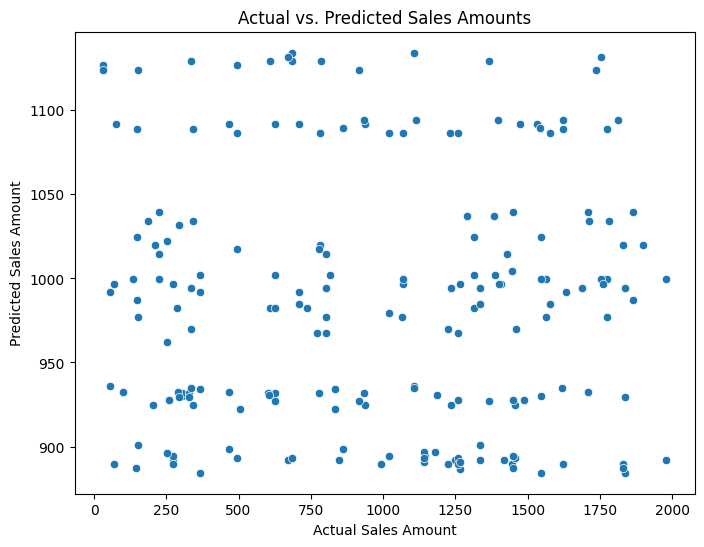

In [372]:
# Assuming 'y_test' is the actual sales amounts and 'y_pred' is the predicted sales amounts
plt.figure(figsize=(8, 6))
sb.scatterplot(x=y_multi_test, y=y_multi_pred)
#plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--', label='Line of Best Fit')
plt.title('Actual vs. Predicted Sales Amounts')
plt.xlabel('Actual Sales Amount')
plt.ylabel('Predicted Sales Amount')
plt.show()


# Multi-Linear Regression Results

Again the score for the Multi-Linear Regression is bad.
The bad scores could be attributed to the fact that the sales don't differ much between the columns used (CustomerGender, ProductRatings, ProductCategory etc) with the exception of CustomerLocation.
Another reason could be a weak correlation between the sales amount and the other variables as well as a non-linear relationship between the predictors and the target variable.

# Clustering

We will use clustering to find distinct customer sections (if there are any).
Because the K-means algorithm is not directly applicable to categorical data (columns CustomerLocation and CustomerGender) but we also have numeric values in the column CustomerAge we will use the algorithm K-Prototype.

In [373]:
!pip install kmodes

In [374]:
from kmodes.kprototypes import KPrototypes

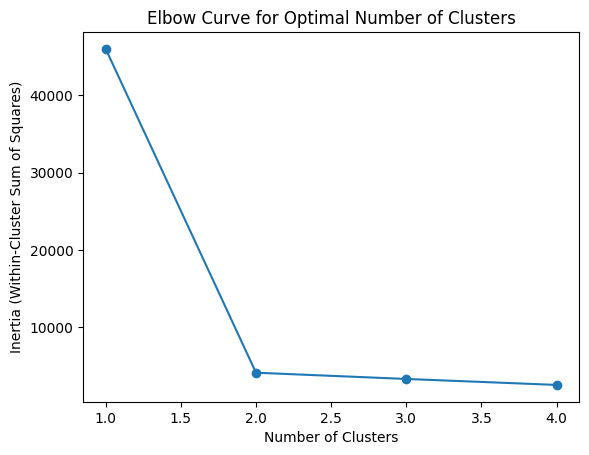

In [375]:
# Extract relevant columns for clustering
X_prototype = retail_sales[['CustomerAge', 'CustomerLocation', 'CustomerGender']]

# Specify the indices of categorical columns
categorical_indices = [1, 2]

# Range of clusters to test
clusters_range = range(1, 5)

# Initialize list to store inertia values
inertia_values = []

# Calculate inertia for each cluster value
for n_clusters in clusters_range:
    kproto = KPrototypes(n_clusters=n_clusters, init='Cao', verbose=0)
    clusters = kproto.fit_predict(X_prototype.values, categorical=categorical_indices)
    inertia_values.append(kproto.cost_)

# Plot the elbow curve
plt.plot(clusters_range, inertia_values, marker='o')
plt.title('Elbow Curve for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia (Within-Cluster Sum of Squares)')
plt.show()

# Based on the elbow curve we will use 2 clusters

In [376]:
# Set the number of clusters
n_clusters = 2

# Initialize KPrototypes with the specified number of clusters
kproto = KPrototypes(n_clusters=n_clusters, init='Cao', verbose=2)

# Fit and predict the clusters
clusters = kproto.fit_predict(X_prototype.values, categorical=categorical_indices)

# Add cluster labels to the original DataFrame
retail_sales['Cluster'] = clusters

# Display the resulting DataFrame with cluster labels
print(retail_sales)

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 0, ncost: 4160.873359653125
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/100, moves: 0, ncost: 4160.873359653125
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 3, iteration: 1/100, moves: 506, ncost: 4160.873359653125
Run: 3, iteration: 2/100, moves: 0, ncost: 4160.873359653125
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 4, iteration: 1/100, moves: 0, ncost: 4160.873359653125
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 5, iteration: 1/100, moves: 0, ncost: 4160.873359653125
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 6, iteration: 1/100, moves: 0, ncost: 4160.873359653125
Init: initializ

In [377]:
retail_sales[retail_sales['Cluster'] == 0]

,SalesDate,ProductCategory,SalesAmount,CustomerAge,CustomerGender,CustomerLocation,ProductRatings,Cluster
0,2023-10-15,Home Appliances,609,22,Male,USA,4,0
1,2023-09-16,Clothing,1367,22,Female,Australia,5,0
2,2022-09-06,Electronics,1736,22,Male,UK,2,0
5,2023-08-15,Clothing,379,22,Male,Australia,3,0
10,2022-06-19,Home Appliances,292,22,Male,Australia,3,0
...,...,...,...,...,...,...,...,...
994,2022-10-16,Electronics,881,22,Female,USA,3,0
995,2023-12-02,Clothing,801,22,Male,Australia,3,0
997,2023-07-30,Home Appliances,144,22,Female,Canada,2,0
998,2023-01-05,Electronics,1688,22,Male,USA,3,0


In [378]:
retail_sales[retail_sales['Cluster'] == 1]

,SalesDate,ProductCategory,SalesAmount,CustomerAge,CustomerGender,CustomerLocation,ProductRatings,Cluster
3,2023-02-24,Electronics,1838,35,Male,India,2,1
4,2022-09-24,Home Appliances,1829,35,Male,UK,5,1
6,2022-07-19,Clothing,1459,35,Male,USA,5,1
7,2023-12-09,Clothing,1656,35,Male,USA,3,1
8,2022-08-07,Electronics,366,35,Male,Canada,2,1
...,...,...,...,...,...,...,...,...
989,2022-12-03,Electronics,1838,35,Male,USA,2,1
990,2022-07-17,Clothing,292,35,Male,India,5,1
992,2023-03-30,Home Appliances,1145,35,Male,UK,4,1
993,2023-03-20,Clothing,273,35,Male,Canada,3,1


In [379]:
#Let's try with the k-means algorithm

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
from sklearn.preprocessing import OneHotEncoder

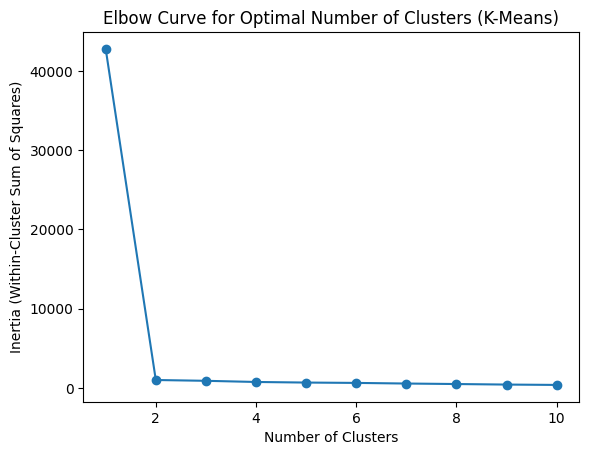

In [380]:
# Specify numerical and categorical features

retail_sales_demogr = retail_sales[['CustomerAge', 'CustomerLocation', 'CustomerGender']]
numerical_features = ['CustomerAge']
categorical_features = ['CustomerLocation', 'CustomerGender']

# Create a column transformer with one-hot encoding for categorical variables
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numerical_features),
        ('cat', OneHotEncoder(drop='first'), categorical_features)
    ])

# Create a pipeline with the column transformer and k-means clustering
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('kmeans', KMeans(random_state=42))
])

# Specify the range of clusters to test
clusters_range = range(1, 11)

# Initialize list to store inertia values
inertia_values = []

# Calculate inertia for each cluster value
for n_clusters in clusters_range:
    pipeline.set_params(kmeans__n_clusters=n_clusters)
    pipeline.fit(retail_sales_demogr)
    inertia_values.append(pipeline.named_steps['kmeans'].inertia_)

# Plot the elbow curve
plt.plot(clusters_range, inertia_values, marker='o')
plt.title('Elbow Curve for Optimal Number of Clusters (K-Means)')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia (Within-Cluster Sum of Squares)')
plt.show()

#From the elbow curver we can see that the optimum number of clusters are 2

In [381]:
# Create a pipeline with the column transformer and k-means clustering (2 clusters)
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('kmeans', KMeans(n_clusters=2, random_state=42))
])

# Fit the model and predict clusters
retail_sales_demogr['Cluster'] = pipeline.fit_predict(retail_sales_demogr)

# Display the resulting DataFrame with cluster labels
print(retail_sales_demogr)

     CustomerAge CustomerLocation CustomerGender  Cluster
0             22              USA           Male        1
1             22        Australia         Female        1
2             22               UK           Male        1
3             35            India           Male        0
4             35               UK           Male        0
..           ...              ...            ...      ...
995           22        Australia           Male        1
996           35           Canada         Female        0
997           22           Canada         Female        1
998           22              USA           Male        1
999           22            India         Female        1

[989 rows x 4 columns]


# Clustering Results

From both methods (K-means and K-prototype) we can see that the clustering was based on the customer age with one cluster being the customers aged 22 and the other cluster being the customers of age 35.